In [1]:
! ls

0698720000-03152021 (1).pdf
0698720000-03152021.pdf
0698720000-06162021.pdf
0698720000-07072021 (1).pdf
0698720000-07072021.pdf
0698720000-09132021.pdf
0698720000-12092021.pdf
10-Page Notes.pdf
10splitslite.R
10splits.R
110623 CCR SSSC Handbook rev1.pdf
1-Page Notes.pdf
2018-Evans et al-Selecting between sample RNA-seq normalization methods.pdf
2018 MazdaCX5_files
2018MazdaCX-5_files
2018MazdaCX-5.html
2020-08-20-raspios-buster-arm64.zip
2020-08-20-raspios-buster-armhf-lite.zip
2020Federal.pdf
2020Maryland.pdf
2021.07.11.451967.source.xml
2021-10-30-raspios-bullseye-armhf-full.zip
2021_12_14_16_35_44.mp3
2021-Nat Gen-Single-cell transcriptomic analyses provide insights into the developmental origins of neuroblastoma.pdf
20-EJP411.pdf
28preYang.rda
41467_2015_BFncomms6901_MOESM123_ESM.xlsx
41467_2015_BFncomms6901_MOESM124_ESM.zip
502_07_00_Lawson_Design-and-Analysis-of-Experiments-with-R-2017.pdf
7762400000-04192021.pdf
7762400000-07192021.pdf
8e069597c658810567ced5f8046dc5d14ab93037.zi

In [2]:
import pandas as pd
from sklearn import decomposition

In [3]:
df = pd.read_csv('matrix.csv')
df

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [4]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [5]:
non_snp_columns = ['Population code', 'Sample']

In [6]:
df_snps = df.drop(non_snp_columns, axis=1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [8]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [9]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

In [10]:
import matplotlib.pyplot as plt

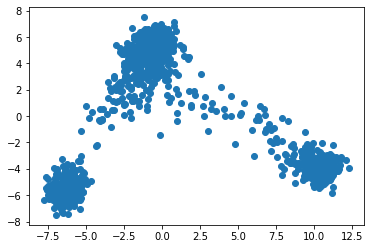

In [11]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

In [12]:
import altair as alt

In [13]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [14]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273754
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [15]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [16]:
pop = pd.read_csv('igsr_populations.tsv', sep='\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,171,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,FIN,FIN,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,105,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.400000,-66.100000,AMR,American Ancestry,#710027,2,150,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,124,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,ACB,ACB,African Caribbean,African Caribbean in Barbados,13.100000,-59.620000,AFR,African Ancestry,#ffd845,1,123,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,EstonianSGDP,Estonian,Estonian in Estonia (SGDP),58.500000,24.900000,NaN,West Eurasia (SGDP),#001f54,19,2,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,3,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,3,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,3,Simons Genome Diversity Project


In [17]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [18]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill='Population code'
)

alt.Chart(...)

# tSNE

In [19]:
from sklearn.manifold import TSNE

In [21]:
X = matrix
X_embedded = TSNE(n_components=2,
                  init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [22]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]

In [23]:
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections,tsne1,tsne2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-17.555254,1.537181
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-15.662360,1.898352
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-19.741098,-6.191134
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-17.504715,5.897302
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-17.137997,2.706761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-14.979344,0.672757
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-15.594403,2.926114
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-16.061699,7.705464
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-10.176635,5.755323


### tSNE:

In [24]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [25]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

### PCA:

In [26]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)